## Evaluation of Social Single-User Recommendation Algorithms

### Loading recommendation output and test data

In [1]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats

# Item-Item Knn Collaborative Filtering
ii_recs = pd.read_csv('output/ii/recs.csv')
test_data_ii = pd.read_csv('output/ii/testdata.csv')
preds_ii = pd.read_csv('output/ii/preds.csv')

# Trust
trst_recs = pd.read_csv('output/trst/recs.csv')
test_data_trst = pd.read_csv('output/trst/testdata.csv')
preds_trst = pd.read_csv('output/trst/preds.csv')

# Social Similarity
socsim_recs = pd.read_csv('output/socsim/recs.csv')
test_data_socsim = pd.read_csv('output/socsim/testdata.csv')
preds_socsim = pd.read_csv('output/socsim/preds.csv')

# Domain Expertise
domex_recs = pd.read_csv('output/domex/recs.csv')
test_data_domex = pd.read_csv('output/domex/testdata.csv')
preds_domex = pd.read_csv('output/domex/preds.csv')

# Social Hierarchy
hierch_recs = pd.read_csv('output/hierch/recs.csv')
test_data_hierch = pd.read_csv('output/hierch/testdata.csv')
preds_hierch = pd.read_csv('output/hierch/preds.csv')

# Social Capital
socap_recs = pd.read_csv('output/socap/recs.csv')
test_data_socap = pd.read_csv('output/socap/testdata.csv')
preds_socap = pd.read_csv('output/socap/preds.csv')

# Social Context Similarity
soxsim_recs = pd.read_csv('output/soxsim/recs.csv')
test_data_soxsim = pd.read_csv('output/soxsim/testdata.csv')
preds_soxsim = pd.read_csv('output/soxsim/preds.csv')


# Sympathy
symp_recs = pd.read_csv('output/symp/recs.csv')
test_data_symp = pd.read_csv('output/symp/testdata.csv')
preds_symp = pd.read_csv('output/symp/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [2]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results_ii = rla.compute(ii_recs, test_data_ii)
results_trst = rla.compute(trst_recs, test_data_trst)
results_socsim = rla.compute(socsim_recs, test_data_socsim)
results_domex = rla.compute(domex_recs, test_data_domex)
results_hierch = rla.compute(hierch_recs, test_data_hierch)
results_socap = rla.compute(socap_recs, test_data_socap)
results_soxsim = rla.compute(soxsim_recs, test_data_soxsim)
results_symp = rla.compute(symp_recs, test_data_symp)

In [3]:
results = pd.concat([results_ii, results_trst, results_socsim, results_domex, results_hierch, results_socap, results_soxsim, results_symp])
results.groupby('Algorithm').ndcg.mean()

Algorithm
domex     0.109153
hierch    0.104768
ii        0.058497
socap     0.101826
socsim    0.090960
soxsim    0.107273
symp      0.103022
trst      0.127044
Name: ndcg, dtype: float64

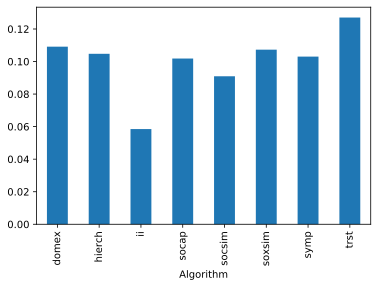

In [4]:
set_matplotlib_formats('svg')
results.groupby('Algorithm').ndcg.mean().plot.bar()

### 2. Prediction Metrics: RMSE

Item Item Knn: max rmse per user = 0.9452494105174063, min rmse per user = 0.005199324324324017, average rmse per user = 0.2245938306536249
Trust: max rmse per user = 1.0521909937490252, min rmse per user = 0.005199324324324017, average rmse per user = 0.3650445683029249
Domain Expertise: max rmse per user = 1.0797626458056322, min rmse per user = 0.005199324324324017, average rmse per user = 0.3522136554317011
Social Hierarchy: max rmse per user = 1.0519414859181555, min rmse per user = 0.005199324324324017, average rmse per user = 0.36295099686614307
Social Capital: max rmse per user = 1.2044088908592143, min rmse per user = 0.005199324324324017, average rmse per user = 0.36220201326635104
Social Context Similarity: max rmse per user = 1.007549874576522, min rmse per user = 0.005199324324324017, average rmse per user = 0.3624765006842157
Sympathy: max rmse per user = 1.0258295755292293, min rmse per user = 0.005199324324324017, average rmse per user = 0.3506094423611407


{'whiskers': [<matplotlib.lines.Line2D at 0x12a1e6c10>,
 'caps': [<matplotlib.lines.Line2D at 0x12a1f06d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12a1e6050>,
 'medians': [<matplotlib.lines.Line2D at 0x12a1f0c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a1fb650>,
 'means': []}

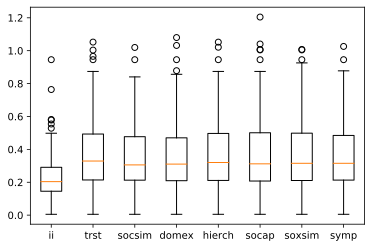

In [5]:
user_rmse_ii = (preds_ii.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_trst = (preds_trst.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_socsim = (preds_socsim.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_domex = (preds_domex.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_hierch = (preds_hierch.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_socap = (preds_socap.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_soxsim = (preds_soxsim.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_symp = (preds_symp.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()



print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp'])


